<a href="https://colab.research.google.com/github/Lkrasnop/Master-degree-Data_science_final_project/blob/main/Final_Project_EDA_02_10_2023_data_visualisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project - Lior Krasnopolski and Karin Shauli - version 02.10.2023

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# פילטרים כללים:

בין הגילאים 20 -80

לעבוד רק על האוכלסייה הגברית

# משימות לתאריך 01.10.2023:

1. איחוד בין רשימת הגנים במאמר לבין רשימת הגנים הקיימים אצלנו. - **בוצע**

2. להדפיס קורולציה מסוג קלאסטר רק עבור הגנים שהייתה להם התאמה בסעיף ראשון - **בוצע**

3. לבחור שתיים שלוש גנים מתוך סעיף 2 לפי לוגיקה מסויימת. - **בוצע**

4. להדפיס גרף של שונות כתלות בגיל (כל חמש שנים) עבור גנים מסעיף שלוש . - **בתהליך**

5. להדפיס גרף של ממוצע פרובים כתלות בגיל עבור הגנים מסעיף שלוש. -  **בוצע**



# משימות לתאריך 09.10.2023

1. לייצר פונקציות של הגרפים  - **בוצע**

2. לייצר פונקציה שתשווה בין שמות ראשיים לבין שמות משניים בפונקציית הקורולציה

3. להשוות את הבלוקים לרצפים.


- מכינים רשימה - שדה ראשון גן (640 גנים) ועוד שדות של כל הפרובים של אותם גנים

- לבדוק כמה פרובים מתוך רשימת הפרובים המלאה נמצאים בGSE
לפי חלוקה לגנים
- אחר כך להוסיף שדה של כמה פרובים עבור כל גן יש לנו בGSE לעומת כמה באמת יש.
פרובים עם אחוז נמוך נשקול אולי להוריד
- להכניס את זה לגרף - גן לפי סדר, מס' פרובים לכל גן
(בהמשך אולי נחליט להסיר גנים עם פרובים מתחת ל10 למשל)

פרובים שערך הבטא בהם משתנה -

פרוב מסוים - לעשות פיזור של כל הנתונים שיש ממנו.
עבור כל פרוב - לחשב a,b, R2


- לחפש פרובים שהשונות עם הזמן (גיל)

- נחפש גנים מעניינים - שבולטים מאיזו שהיא סיבה ונעשה להם מפת חום ואז נבדוק עבור מי שיש לו בלוקים - את המיקום על הגן.


-

In [ ]:
import pandas as pd
from statistics import mean
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn.objects as so

# משימה 1 - קורלציה של כל הפרובים על כל גן בנפרד.

In [ ]:
df_GSE87571_normalized_celltype_and_patient_info = pd.read_csv('/content/drive/MyDrive/Final Project Data Science Master/df_final.csv')
df_GSE87571_normalized_celltype_and_patient_info = df_GSE87571_normalized_celltype_and_patient_info[['cg','normalized','age','UCSC_RefGene_Name']]
df_GSE87571_normalized_celltype_and_patient_info.rename(columns={'UCSC_RefGene_Name':"gene"},inplace =True)
df_GSE87571_normalized_celltype_and_patient_info.rename(columns={'normalized':"value"},inplace =True)
display(df_GSE87571_normalized_celltype_and_patient_info)

<ipython-input-151-ec797147458f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GSE87571_normalized_celltype_and_patient_info.rename(columns={'UCSC_RefGene_Name':"gene"},inplace =True)
<ipython-input-151-ec797147458f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GSE87571_normalized_celltype_and_patient_info.rename(columns={'normalized':"value"},inplace =True)


,cg,value,age,gene
0,cg00000321,0.267138,55.0,SFRP1
1,cg00000321,0.286995,23.0,SFRP1
2,cg00000321,0.329600,72.0,SFRP1
3,cg00000321,0.318397,74.0,SFRP1
4,cg00000321,0.260389,38.0,SFRP1
...,...,...,...,...
63296157,cg27666046,0.553640,53.0,SECTM1
63296158,cg27666046,0.606716,70.0,SECTM1
63296159,cg27666046,0.543427,72.0,SECTM1
63296160,cg27666046,0.596561,54.0,SECTM1


In [ ]:
df_GSE87571_normalized_celltype_and_patient_info

In [ ]:
# df = df_GSE87571_normalized_celltype_and_patient_info[df_GSE87571_normalized_celltype_and_patient_info.columns[1:]]
df = df_GSE87571_normalized_celltype_and_patient_info.copy()
grouped = df.groupby('gene')

In [ ]:
""" the function create_gene_cluster_map takes gene and grouped df by genes,
bulid corrlation matrix and print cluster map - shows probes correlation
in each gene by correlation distance
grouped_df - df grouped by gene
gene_name - specific gene of interest"""
def create_gene_cluster_map(grouped_df, gene_name):
    # Choose for specific gene
    gene_df = grouped_df.get_group(gene_name)

    # Pivot the data to create a matrix of probes
    probes_data = gene_df.pivot_table(index='age', columns='cg', values='value', aggfunc='mean')

    # Calculate the correlation matrix
    correlation_matrix = probes_data.corr()

    # Create a cluster map
    plt.figure(figsize=(8, 6))
    sns.clustermap(correlation_matrix, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title(f'Correlation Heatmap for Gene: {gene_name}')
    plt.show()


In [ ]:

    # Genes with corr blocks:
# ATG2A, ATG4B ,ATG7 ,BCL2 ,CFLAR ,CTSD ,DAPK1 ,FYTTD1
# GABARAP ,GPR137 ,IGF1R ,INS ,IRS2 ,ITPR1 ,KIAA0226
# MAPK1 ,MRAS ,MRMR14, PIK3CD, PIK3R1, PIK3R2,PIK3R3
# PRKACA, RPTOR, WIPI2

# Activation of autophagy genes that highly expressed when cells was on starvation:
# ATG14, ATG7, NBR1, ULK1, ULK2, WDR45

#both in the corr blocks list and in each of short list in the article:
# ATG7 - activation list
# CTSD - Lysosomal biogenesis


<Figure size 800x600 with 0 Axes>

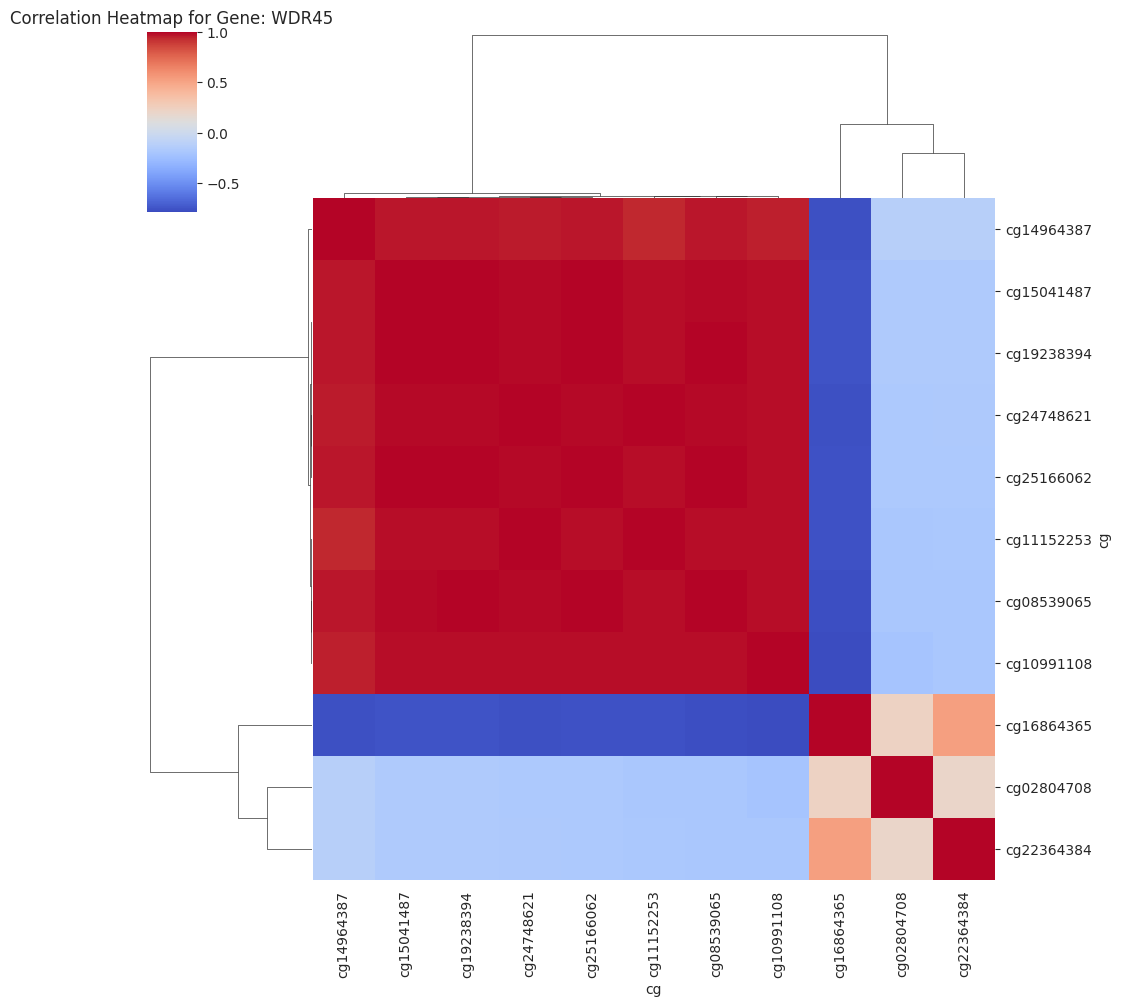

<Figure size 800x600 with 0 Axes>

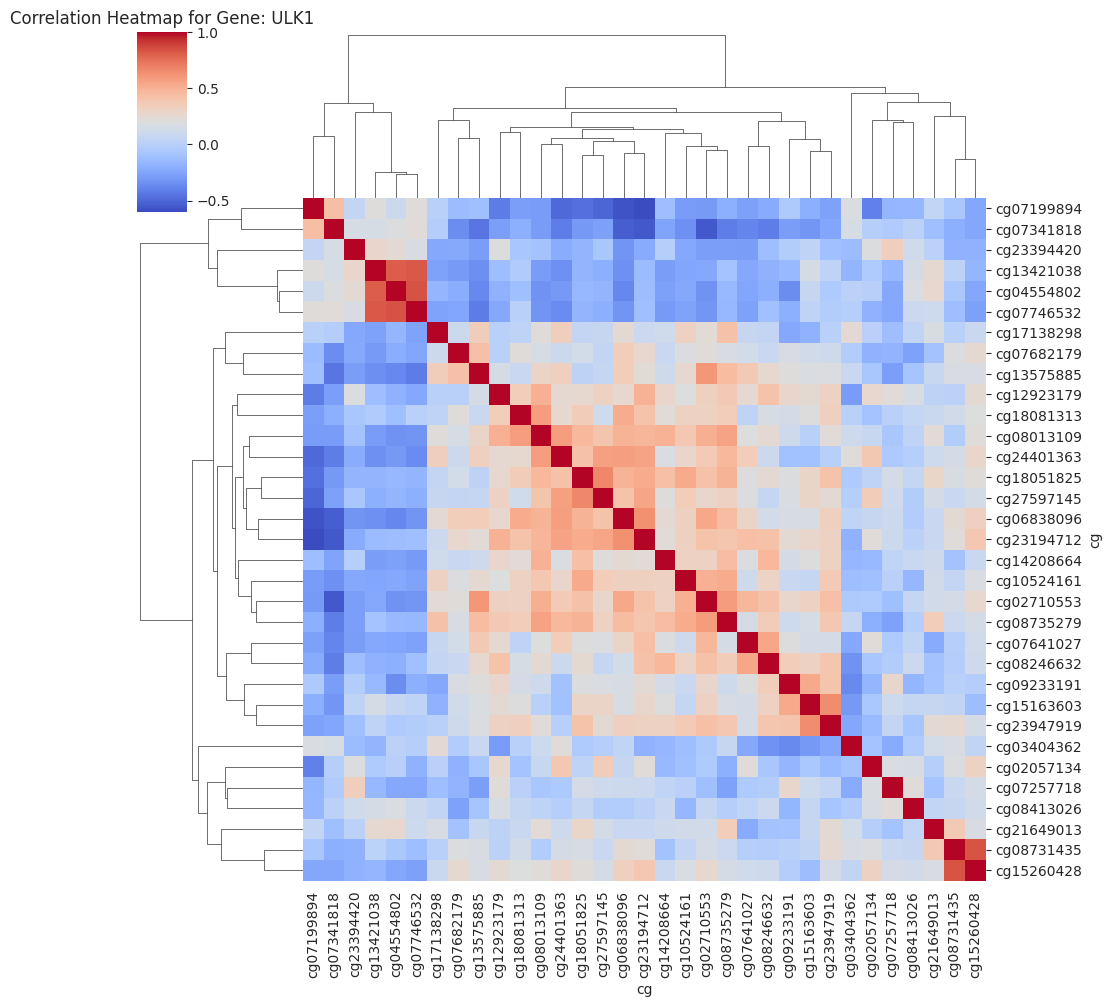

<Figure size 800x600 with 0 Axes>

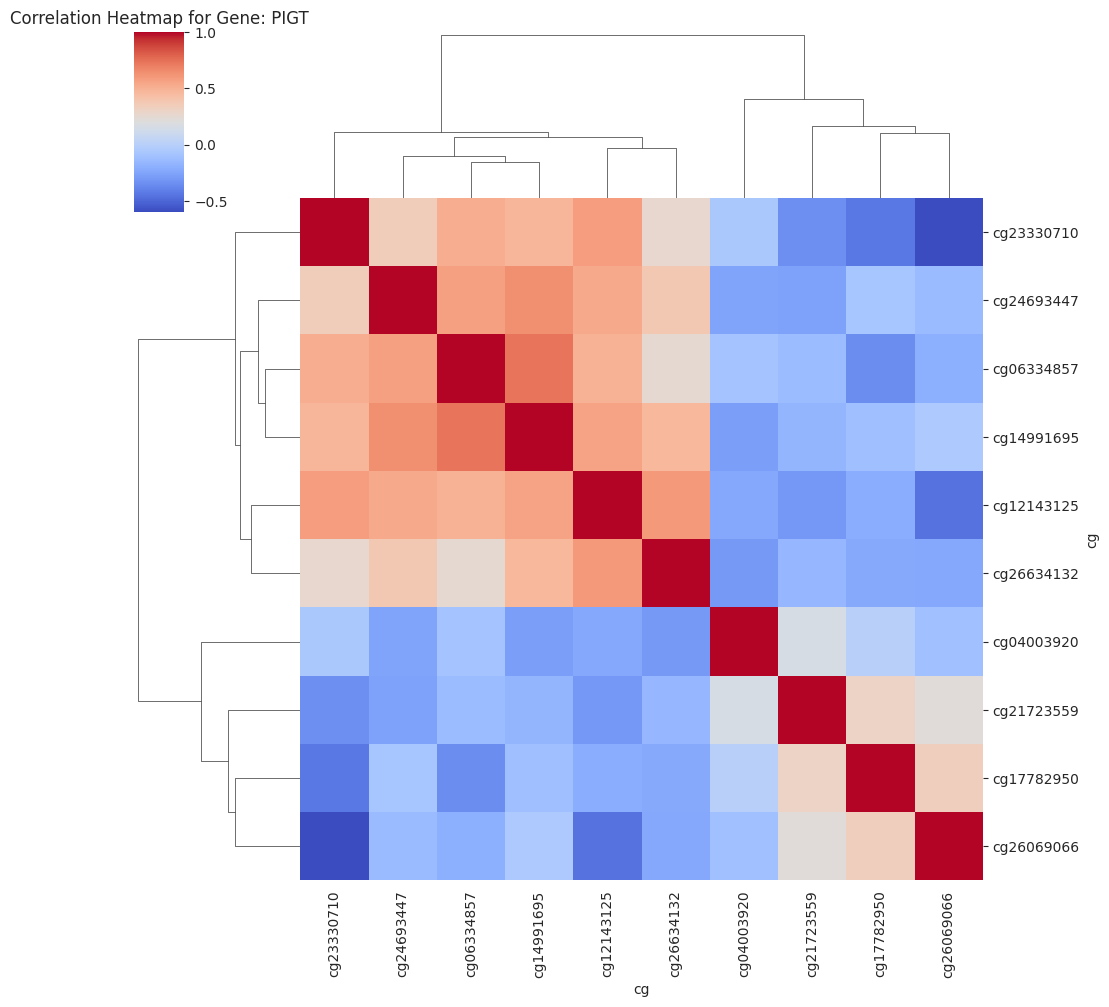

<Figure size 800x600 with 0 Axes>

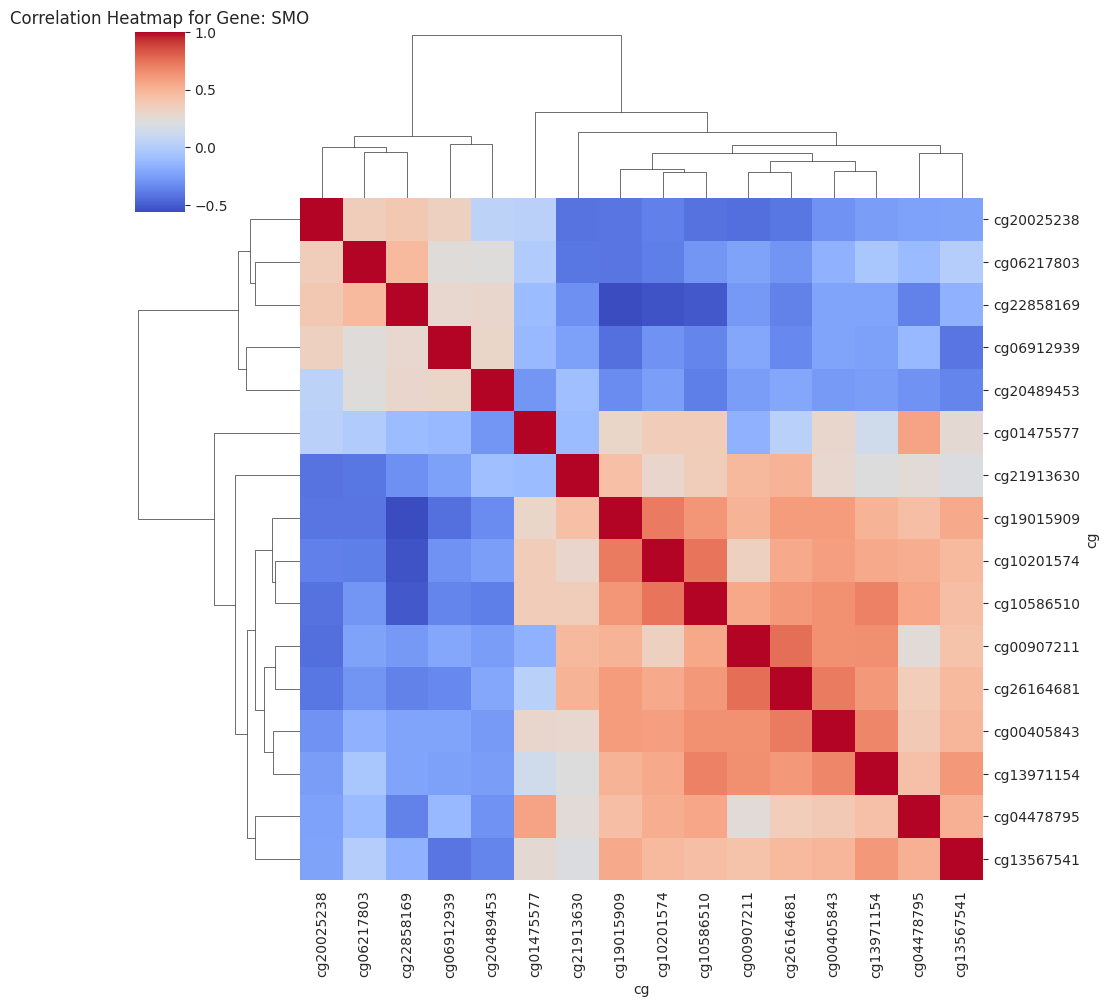

In [ ]:
# genes_lst = ['ATG2A', 'DAPK1' ,'PIGT','SMO'] # test

# genes_lst = ['ATG7', 'NBR1', 'ULK1', 'ULK2', 'WDR45'] # Activation of autophagy genes

genes_lst = ['WDR45', 'ULK1' ,'PIGT','SMO']

for gene in genes_lst:
  create_gene_cluster_map(grouped, gene)

## משימה 2 - הדפסת השונות  וממוצע של הפרובים של הגנים הנבחרים

In [ ]:
def sigma_and_beta_plots(df,genes_lst):
  for elem in genes_lst:
    df_plot = df[df.gene == '{}'.format(elem)]
    df_mean = df_plot.groupby(['cg','age']).mean()
    df_var = df_plot.groupby(['cg','age']).var()

  # plot mean vs age
    fig, ax = plt.subplots(1, 1, figsize=(12,9))

    sns.set_style("darkgrid")

    sns.despine()

    ax = sns.lineplot(data=df_mean, x='age', y='value', hue='cg')

    ax.set(xlabel='age', ylabel='beta (mean)', title='beta (mean) vs age - {}'.format(elem))

    plt.legend(loc='right')

    plt.show()

  # plot sigma vs age

    fig, ax = plt.subplots(1, 1, figsize=(12,9))

    sns.set_style("darkgrid")

    sns.despine()

    ax = sns.lineplot(data=df_var, x='age', y='value', hue='cg')

    ax.set(xlabel='age', ylabel='beta (mean)', title='sigma (var) vs age - {}'.format(elem))

    plt.legend(loc='right')

    plt.show()



<ipython-input-152-dd4c4d7168c5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.groupby(['cg','age']).mean()
<ipython-input-152-dd4c4d7168c5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_var = df_plot.groupby(['cg','age']).var()


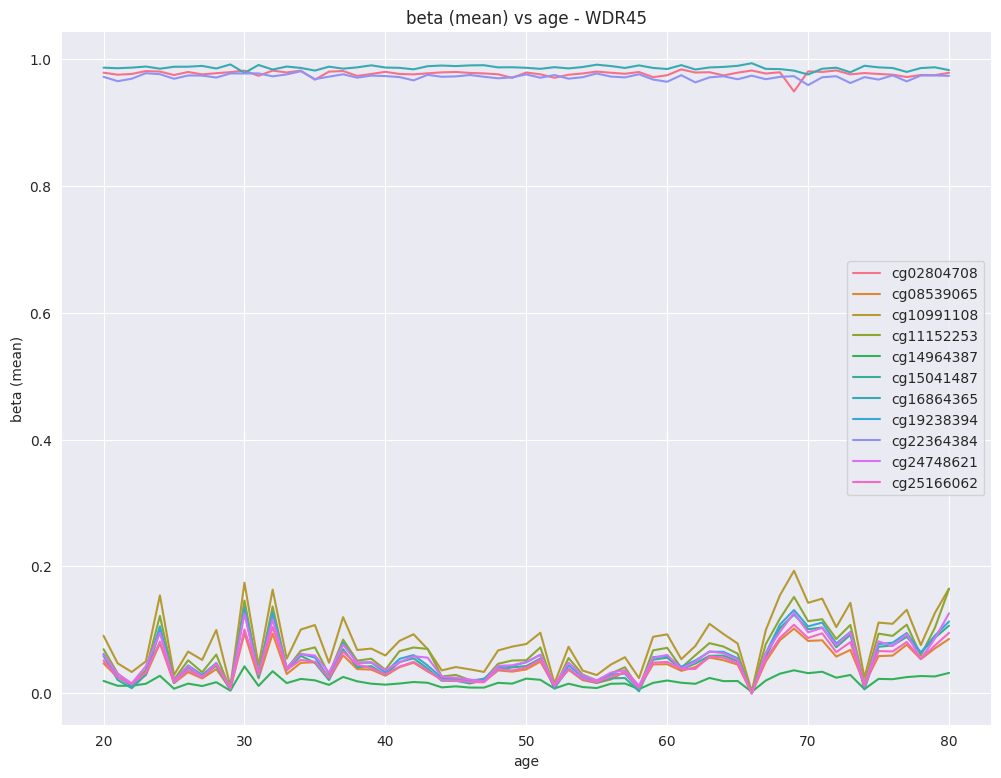

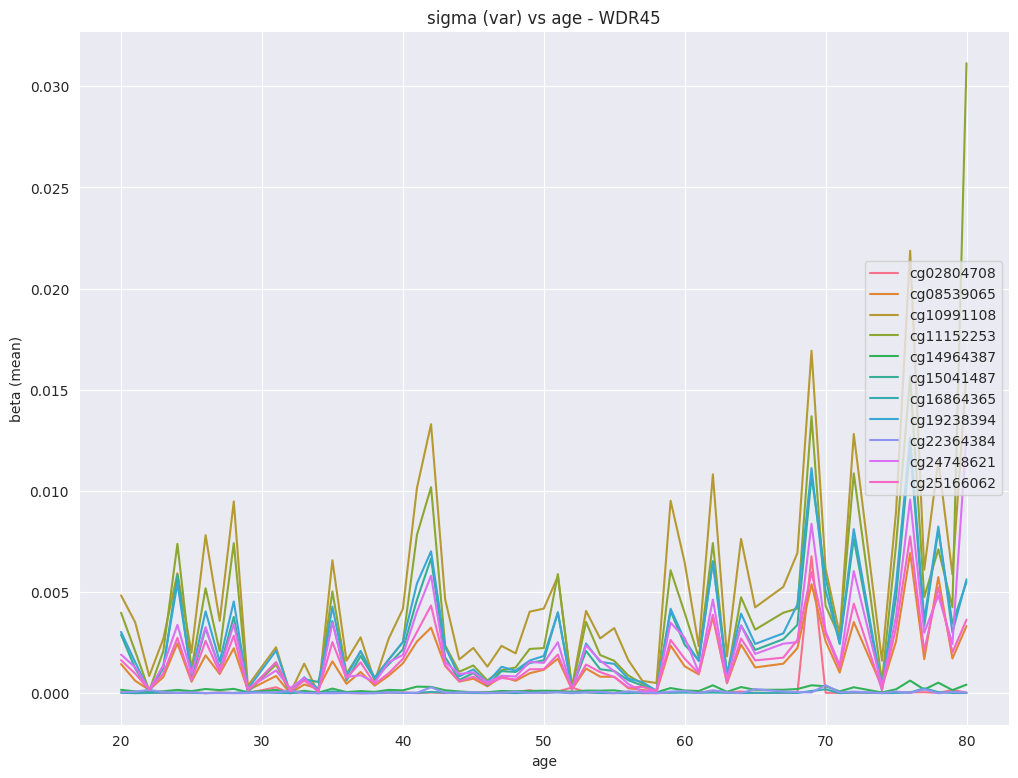

<ipython-input-152-dd4c4d7168c5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.groupby(['cg','age']).mean()
<ipython-input-152-dd4c4d7168c5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_var = df_plot.groupby(['cg','age']).var()


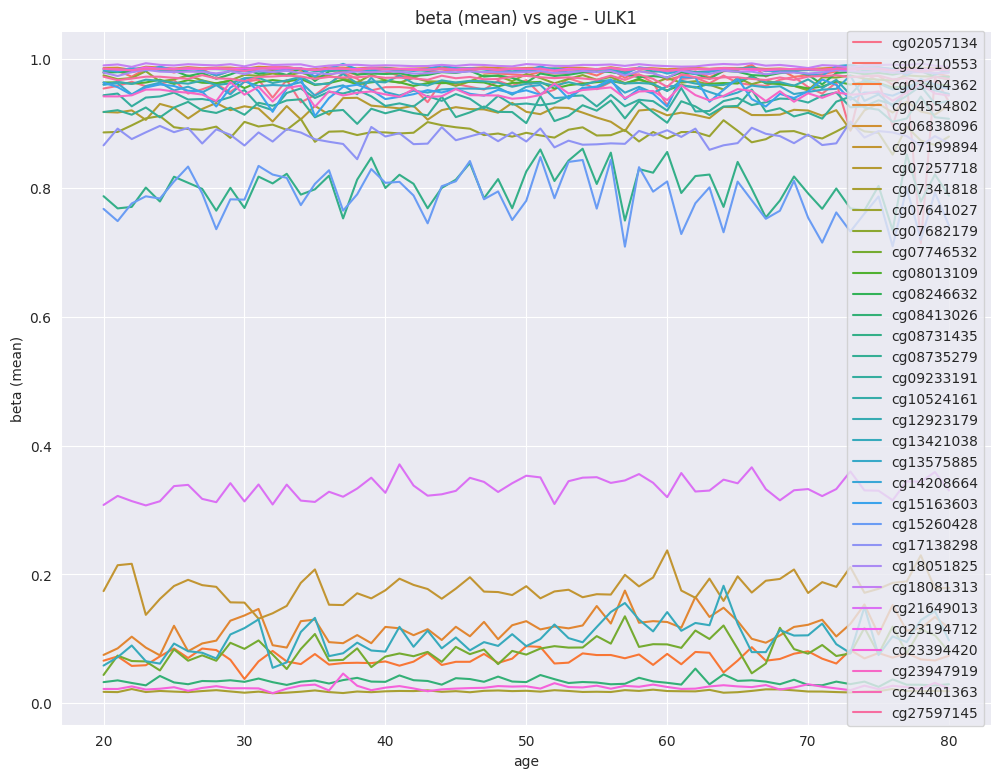

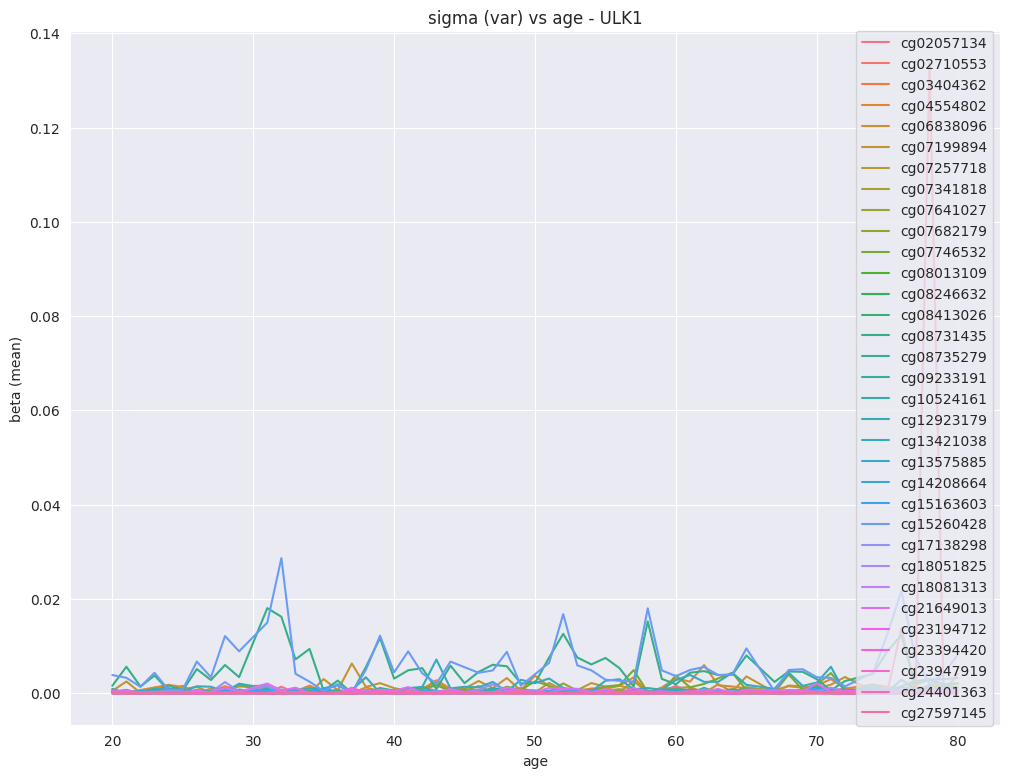

<ipython-input-152-dd4c4d7168c5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.groupby(['cg','age']).mean()
<ipython-input-152-dd4c4d7168c5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_var = df_plot.groupby(['cg','age']).var()


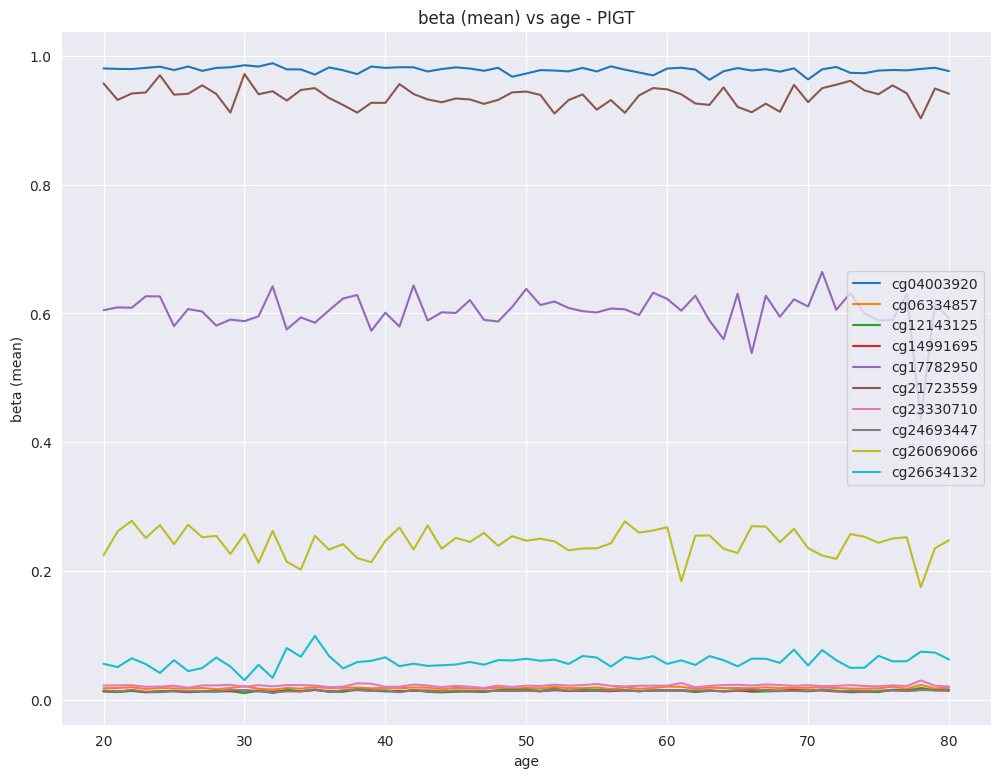

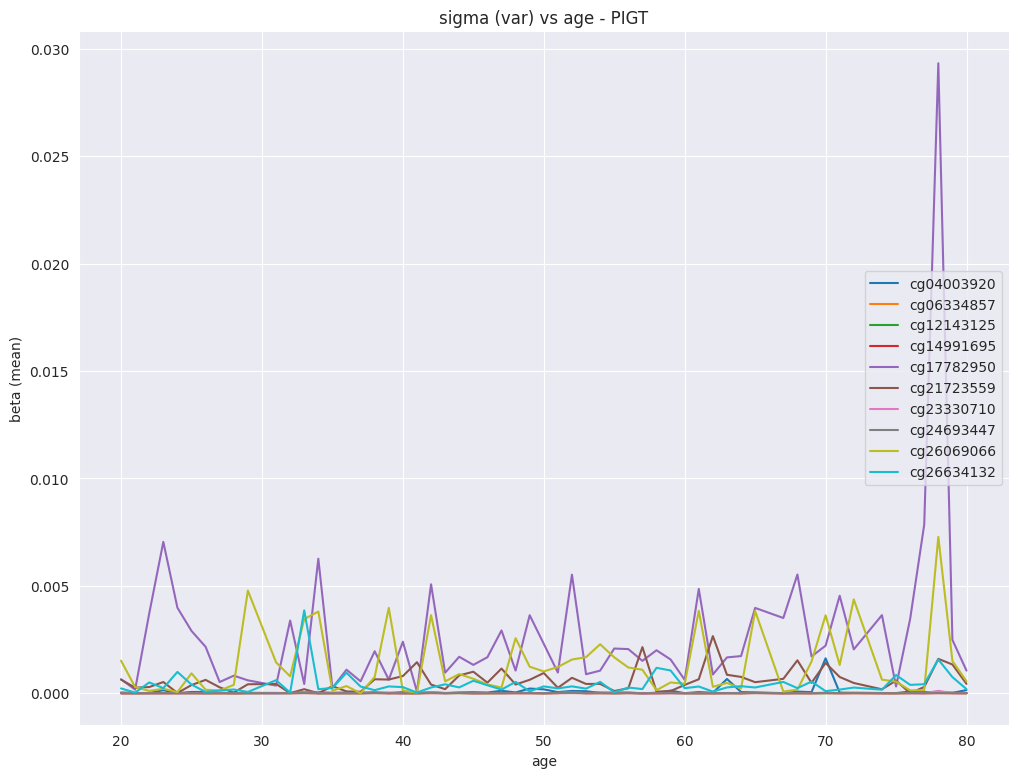

<ipython-input-152-dd4c4d7168c5>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df_plot.groupby(['cg','age']).mean()
<ipython-input-152-dd4c4d7168c5>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_var = df_plot.groupby(['cg','age']).var()


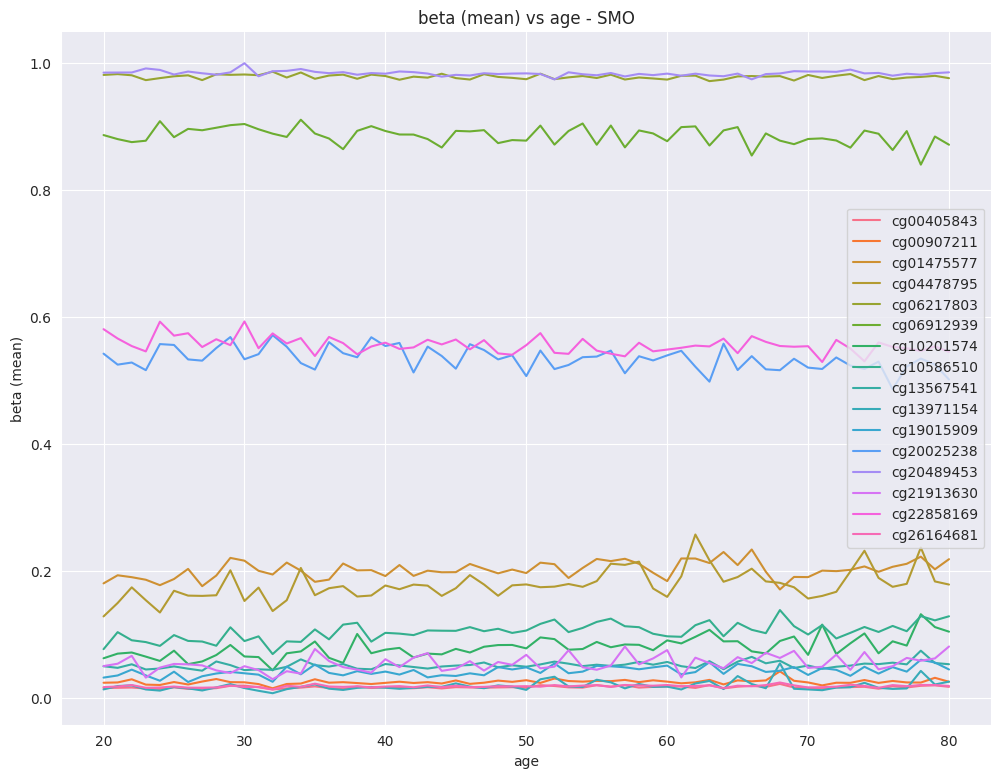

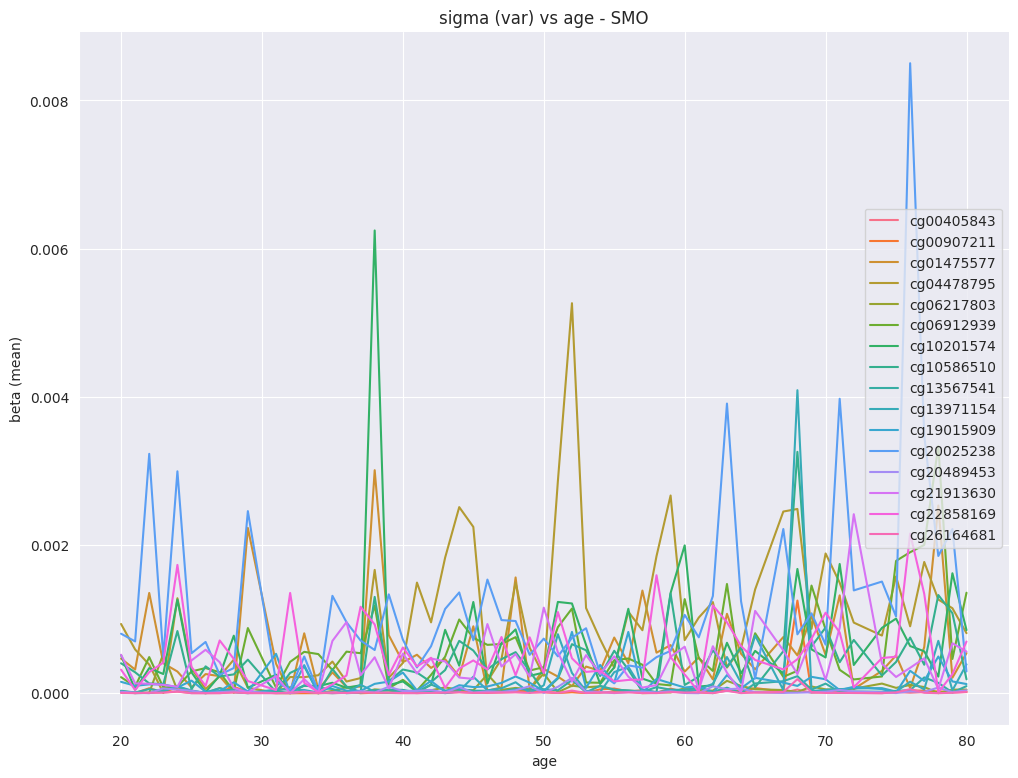

In [ ]:
sigma_and_beta_plots(df_GSE87571_normalized_celltype_and_patient_info,genes_lst)